In [64]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [5]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
X = X.fillna({'Age': X.Age.median()})

In [7]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

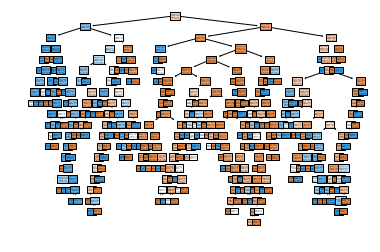

In [10]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape, X_test.shape

((596, 10), (295, 10))

In [14]:
clf.score(X, y)

0.9797979797979798

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
clf.score(X_train, y_train)

0.9798657718120806

In [17]:
clf.score(X_test, y_test)

0.7762711864406779

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
clf.score(X_train, y_train)

0.8238255033557047

In [21]:
clf.score(X_test, y_test)

0.8203389830508474

In [22]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

In [24]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [25]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.796942


In [26]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', 
                           value_name='score')

In [27]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942
203,6,cross_val_score,0.793707
204,7,cross_val_score,0.793608
205,8,cross_val_score,0.793608
206,9,cross_val_score,0.793537
207,10,cross_val_score,0.795190


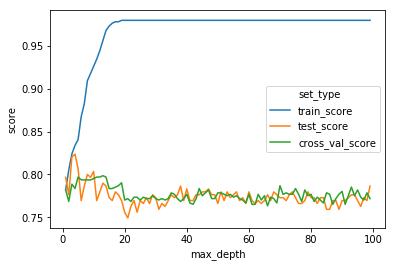

In [28]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [32]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [33]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
clf_grid = tree.DecisionTreeClassifier()

In [37]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [38]:
grid_search_cv_clf = GridSearchCV(clf_grid, parametrs, cv=5)

In [39]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [40]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [41]:
best_clf = grid_search_cv_clf.best_estimator_

In [42]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
y_pred = best_clf.predict(X_test)

In [45]:
precision_score(y_test, y_pred)

0.8315789473684211

In [46]:
recall_score(y_test, y_pred)

0.6583333333333333

In [47]:
y_predicted_prob = best_clf.predict_proba(X_test)

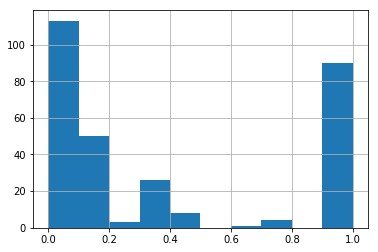

In [48]:
pd.Series(y_predicted_prob[:, 1]).hist();

In [49]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [50]:
precision_score(y_test, y_pred)

0.8444444444444444

In [51]:
recall_score(y_test, y_pred)

0.6333333333333333

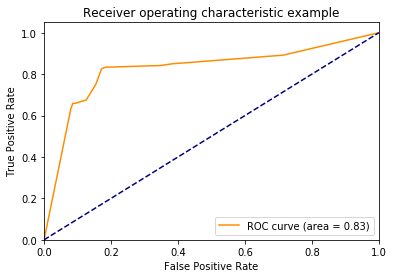

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show();

In [61]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [62]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

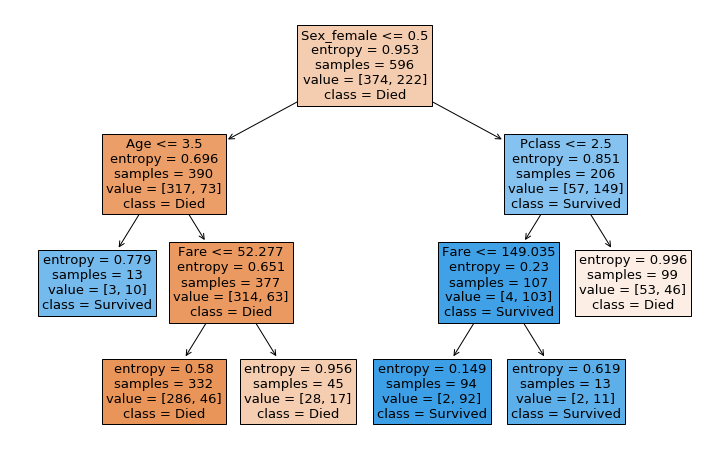

In [65]:
tree.plot_tree(clf, feature_names=list(X_train),
               class_names=['Died', 'Survived'],
               filled=True);

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf_rf = RandomForestClassifier()

In [68]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [69]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [70]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [71]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [72]:
best_clf = grid_search_cv_clf.best_estimator_

In [73]:
best_clf.score(X_test, y_test)

0.8

In [75]:
feature_importances = best_clf.feature_importances_

In [76]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})

In [78]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.214436
4,Fare,0.188536
6,Sex_male,0.177653
1,Age,0.132731
0,Pclass,0.125292
3,Parch,0.050089
2,SibSp,0.049499
7,Embarked_C,0.022389
9,Embarked_S,0.020804
8,Embarked_Q,0.018571


In [80]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5)

In [82]:
y = df.target
X = df.drop('target', axis=1)

In [84]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

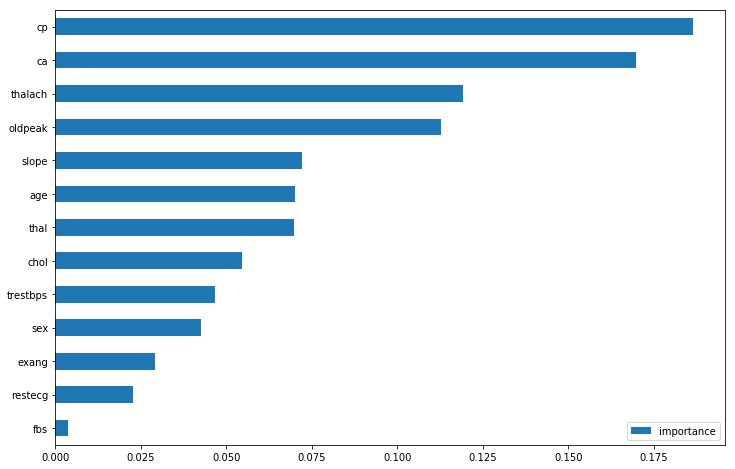

In [87]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8));